# Decision Trees and Random Forests

## 1. Business Understanding
 

## 2. Data Understanding
The dataset is called Phishing Websites Data Set. It was obtained from the UCI Machine Learning Repository. The dataset can be found at the following URL: https://archive.ics.uci.edu/ml/datasets/phishing+websites. The dataset contains 30 features and 1 target variable. The target variable is called Result and it is a binary variable. The value 1 indicates that the website is a phishing website and the value -1 indicates that the website is a legitimate website.

Thera are no missing values in the dataset and all the features are integers ranging from -1 to 1.
The data consists of 11055 samples and 30 features. The features are as follows:
- having_IP_Address
- URL_Length
- Shortining_Service
- having_At_Symbol
- double_slash_redirecting
- Prefix_Suffix
- having_Sub_Domain
- SSLfinal_State
- Domain_registeration_length
- Favicon
- port
- HTTPS_token
- Request_URL
- URL_of_Anchor
- Links_in_tags
- SFH
- Submitting_to_email
- Abnormal_URL
- Redirect
- on_mouseover
- RightClick
- popUpWidnow
- Iframe
- age_of_domain
- DNSRecord
- web_traffic
- Page_Rank
- Google_Index
- Links_pointing_to_page
- Statistical_report
- Result

## 3. Data Preparation
The data preparation steps are as follows:
- Dataset is loaded to a pandas DataFrame from a CSV file.
- The dataset is split into features X and target variable y.
- The target variable is converted to a categorical variable.

In [25]:
import pandas as pd
df = pd.read_csv('datasets/phishing.csv')
X = df.drop(['Result'], axis = 1)
y = df['Result'].astype('category')

## 4. Modeling
The data is trained and tested using two different models. First model is a Decision Tree Classifier and the second model is a Random Forest Classifier. 
The Decision Tree Classifier is trained using a 75/25 train-test split. The Random Forest Classifier is trained using 10-fold cross-validation. The performance of the models is evaluated using accuracy, precision, recall, and confusion matrix.

Parameters of the Decision Tree Classifier:
- max_depth = 4 - The maximum depth of the tree.
- random_state = 20 - The seed used by the random number generator.

Parameters of the Random Forest Classifier:
- n_estimators = 100 - The number of trees in the forest.
- bootstrap = True - Whether bootstrap samples are used when building trees.
- max_samples = 0.7 - If bootstrap is true, the number of samples to draw from X to train each base estimator.
- max_features = 0.75 - The number of features to consider from X when looking for the best split.
- random_state = 123 - The seed used by the random number generator.

Performance metrics for the Decision Tree Classifier:
- Accuracy score: 0.918
- Precision score: 0.929
- Recall score: 0.924
- Confusion matrix:
[[1094  110]
 [ 118 1442]]

Performance metrics for the Random Forest Classifier:
- Overall accuracy (avg. of folds): 0.9655
- Fold-specific accuracies: {f1: 0.97739602, f2: 0.97739602, f3: 0.96473779, f4: 0.97649186, f5: 0.97106691, f6: 0.96470588, f7: 0.95927602, f8: 0.94570136, f9: 0.960181, f10: 0.95837104}
- Confusion matrix:
[[1193   23]
 [  30  916]]

In [29]:
# First model: Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)

# Create a decision tree classifier
modelDt = DecisionTreeClassifier(max_depth=4, random_state=20)
modelDt.fit(X_train, y_train)

# Make predictions
y_pred = modelDt.predict(X_test)

# Show results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.3f}')
precision_score = precision_score(y_test, y_pred)
print(f'Precision score: {precision_score:.3f}')
recall_score = recall_score(y_test, y_pred)
print(f'Recall score: {recall_score:.3f}')

print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy score: 0.918
Precision score: 0.929
Recall score: 0.924
Confusion matrix:
[[1094  110]
 [ 118 1442]]


In [34]:
# Second model: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_samples=0.7, max_features=0.75, random_state=123)

# Carry out 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

# Show results
print(f'Fold-specific accuracies: {cv_scores:}')
print(f'Overall accuracy (avg. of folds): {cv_scores.mean():.4f}') 

Confusion matrix:
[[1162   42]
 [  40 1520]]
Fold-specific accuracies: [0.97739602 0.97739602 0.96473779 0.97649186 0.97106691 0.96470588
 0.95927602 0.94570136 0.960181   0.95837104]
Overall accuracy (avg. of folds): 0.9655


### 4.1. Model Interpretation
The Decision Tree model is visualized using the plot_tree function from sklearn. The plot shows the structure of the tree and the importance of each feature. The most important features are at the top of the tree.

Instructions on how to manually decide if a website is a phishing website or not using the Decision Tree model:
Legitimate Site:
- The site has an SSL certificate and fewer external links.
- The site has an SSL certificate, more external links, but no hyphens in the URL.
- The site has no SSL certificate, fewer external links, and no links pointing to other pages.
Phishing Site:
- The site has an SSL certificate, more external links, and contains hyphens in the URL.
- The site has no SSL certificate, fewer external links, and contains hyphens in the URL.
- The site has no SSL certificate, fewer external links, and more links pointing to other pages.
- The site has no SSL certificate and more external links.

Ins

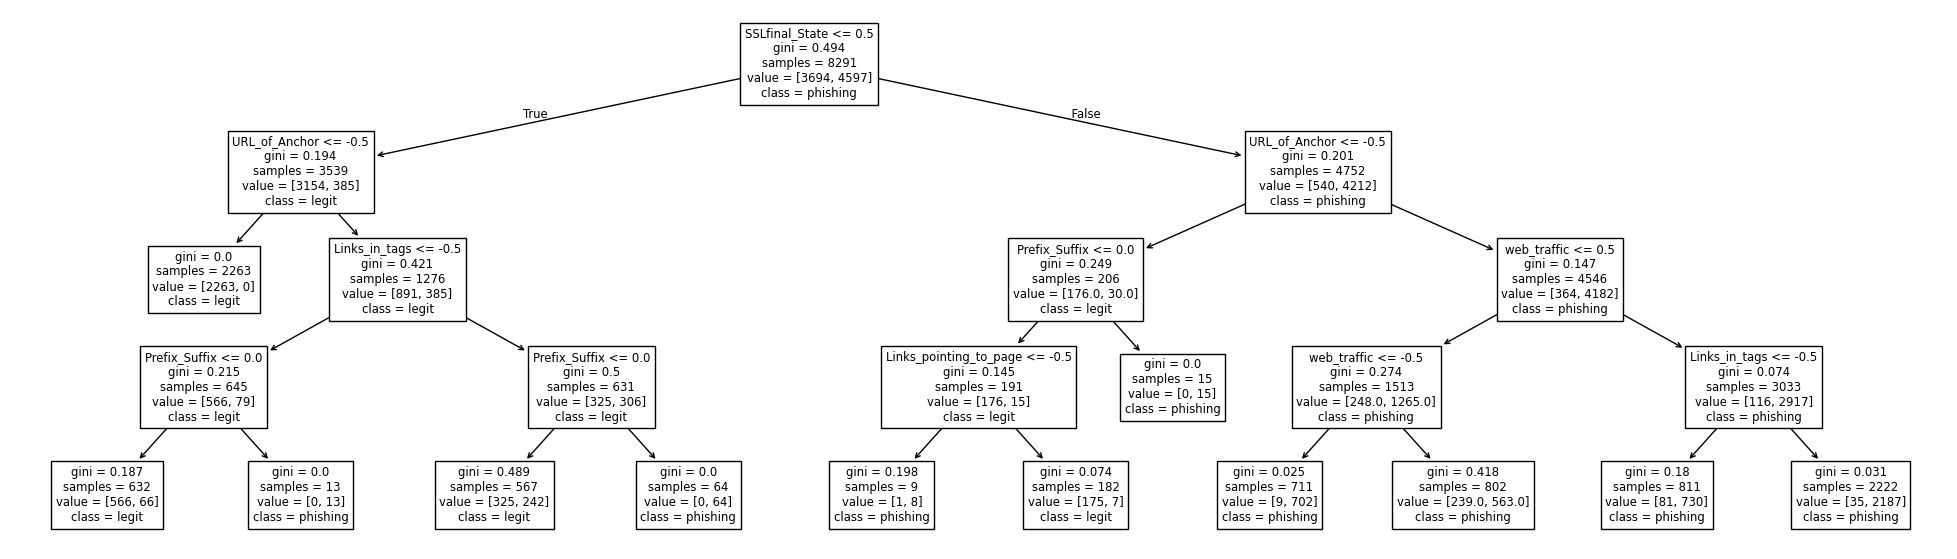

In [28]:
fig = plt.figure(figsize = (25, 7))
plot_tree(modelDt, feature_names = X.keys(), class_names = ['legit', 'phishing'])
plt.show()

## 5. Evaluation

## 6. Deployment